In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
fuel_econ = pd.read_csv('fuel-econ.csv')

sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ.VClass = fuel_econ.VClass.astype(vclasses)

fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

In [3]:
fuel_econ.shape

(3929, 21)

In [4]:
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace=False)
subset = fuel_econ.loc[sample]

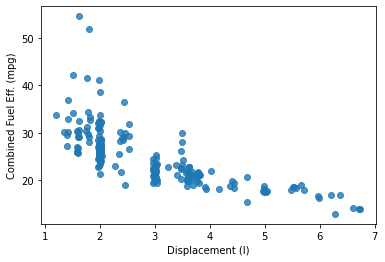

In [5]:
sb.regplot(data=subset, x='displ', y='comb', x_jitter=0.04, fit_reg=False)
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

In [6]:
fuel_econ.trans_type.unique()

array(['Automatic', 'Manual'], dtype=object)

#### Shape as the third non positional encoding : only when the third variable is nominal

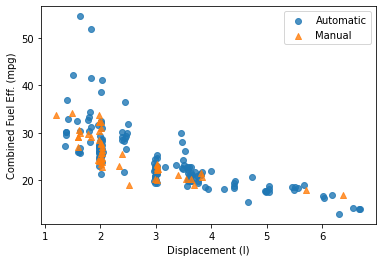

In [7]:
ttypes_markers = [['Automatic', 'o'],
                  ['Manual', '^']
                 ]
for l in ttypes_markers:
    ttype, marker = l
    sb.regplot(data=subset.query(f'trans_type == "{ttype}"'), x='displ', y='comb',
               x_jitter=0.04, marker = marker, fit_reg=False)

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic', 'Manual']);

#### Size as the third non positional encoding : only when the third variable is quantitative

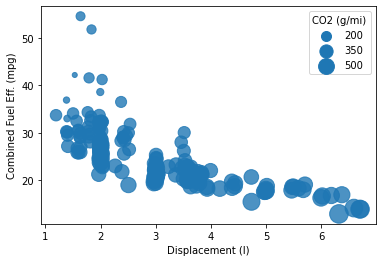

In [8]:
sb.regplot(data=subset, x='displ', y='comb', x_jitter=0.04, fit_reg=False, scatter_kws={'s': subset['co2']/2})
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

legend_obj = []
sizes = [200, 350, 500]
base_color = sb.color_palette()[0]
for s in sizes:
    legend_obj.append(plt.scatter([], [], s=s/2, color = base_color))
plt.legend(legend_obj, sizes, title="CO2 (g/mi)");

#### Color as the third non positional encoding : whether the third variable is nominal, ordinal or quantitative

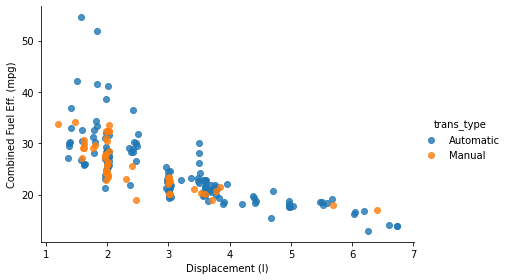

In [9]:
g = sb.FacetGrid(data=subset, hue='trans_type', hue_order=['Automatic', 'Manual'], height=4, aspect=1.5)
g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

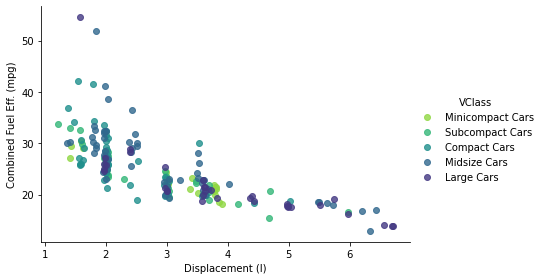

In [10]:
g = sb.FacetGrid(data=subset, hue='VClass', height=4, aspect=1.5, palette='viridis_r')
g.map(sb.regplot, 'displ', 'comb', x_jitter=0.04, fit_reg=False)
g.add_legend()
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

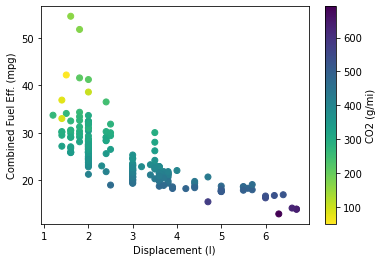

In [11]:
plt.scatter(data=subset, x='displ', y='comb', c='co2', cmap='viridis_r')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.colorbar(label='CO2 (g/mi)');

#### Facetting

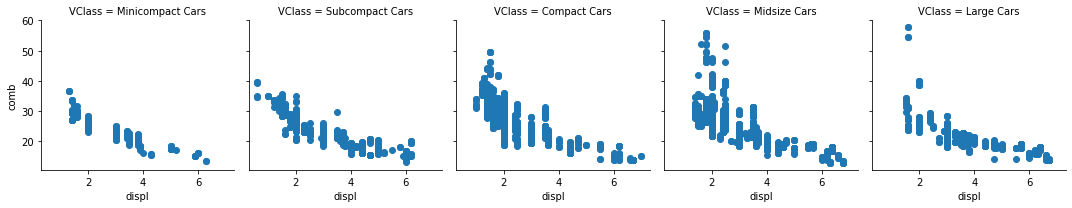

In [12]:
g = sb.FacetGrid(data=fuel_econ, col='VClass')
g.map(plt.scatter, 'displ', 'comb') 

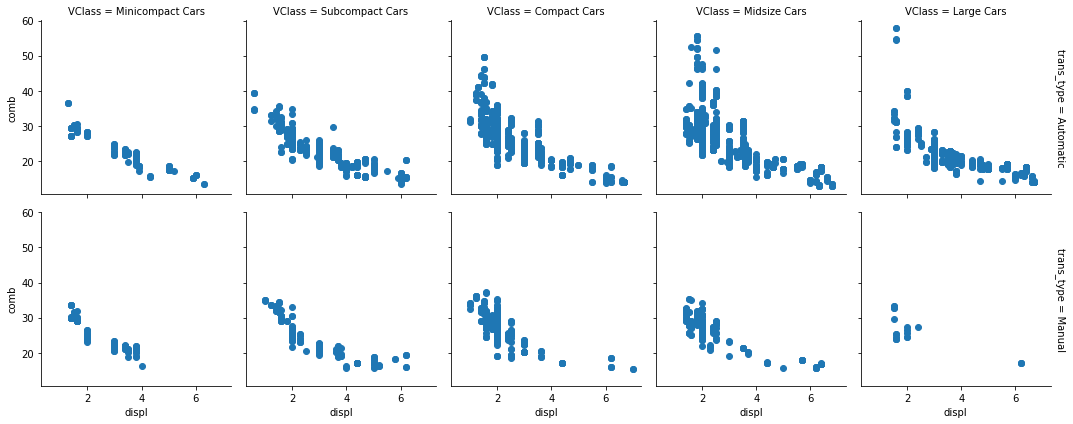

In [13]:
g = sb.FacetGrid(data=fuel_econ, col='VClass', row='trans_type', margin_titles=True)
g.map(plt.scatter, 'displ', 'comb') 

#### Adaptation d'autres graphes bivariés

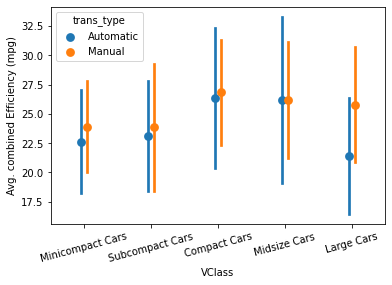

In [20]:
sb.pointplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type', dodge=0.09, ci='sd', linestyles="") #or dodge=True
plt.xticks(rotation=15)
plt.ylabel("Avg. combined Efficiency (mpg)");

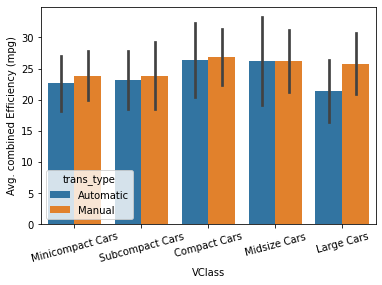

In [24]:
sb.barplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type', ci='sd') #or dodge=True
plt.xticks(rotation=15)
plt.ylabel("Avg. combined Efficiency (mpg)");

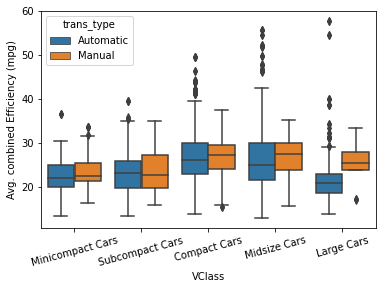

In [26]:
sb.boxplot(data=fuel_econ, x='VClass', y='comb', hue='trans_type') #or dodge=True
plt.xticks(rotation=15)
plt.ylabel("Avg. combined Efficiency (mpg)");

In [27]:
fuel_econ.groupby(['VClass', 'trans_type']).describe()[['comb']]

comb                                           \
                             count       mean       std      min        25%   
VClass           trans_type                                                   
Minicompact Cars Automatic   188.0  22.632796  4.399988  13.3849  19.807000   
                 Manual      133.0  23.888029  3.902636  16.2763  21.214800   
Subcompact Cars  Automatic   502.0  23.112096  4.656162  13.3117  19.674325   
                 Manual      171.0  23.866684  5.430585  15.7195  19.679900   
Compact Cars     Automatic   784.0  26.366554  5.963789  13.7801  22.783275   
                 Manual      338.0  26.823582  4.469208  15.2564  23.916200   
Midsize Cars     Automatic   989.0  26.182453  7.119141  12.8217  21.423600   
                 Manual      199.0  26.168868  4.990314  15.5553  23.890450   
Large Cars       Automatic   605.0  21.378549  4.941444  13.8634  18.558800   
                 Manual       20.0  25.790045  5.007707  17.0000  23.868500   

                                                           
                                  50%        75%      max  
VClass           trans_type                                
Minicompact Cars Automatic   22.06245  24.912100  36.6122  
                 Manual      22.34990  25.361500  33.6254  
Subcompact Cars  Automatic   22.99000  25.773200  39.4850  
                 Manual      22.57530  27.128350  34.8802  
Compact Cars     Automatic   26.02485  29.895425  49.5685  
                 Manual      27.14380  29.552425  37.3442  
Midsize Cars     Automatic   25.00180  30.000000  55.7000  
                 Manual      27.38070  29.821100  35.1882  
Large Cars       Automatic   20.88900  22.779800  57.7824  
                 Manual      25.29510  27.978575  33.3779

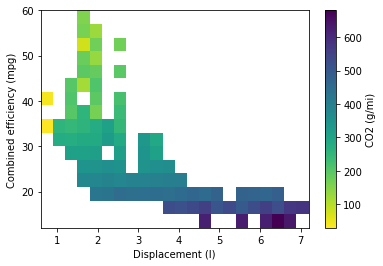

In [81]:
x_bins = np.arange(0.6, 7+0.3, 0.3)
y_bins = np.arange(12, 58+3, 3)


displ_bins = pd.cut(fuel_econ['displ'], x_bins, right=False, include_lowest=False, labels=False).astype(int)
comb_bins  = pd.cut(fuel_econ['comb'],  y_bins, right=False, include_lowest=False, labels=False).astype(int)

n_points = fuel_econ.groupby([displ_bins, comb_bins]).size().reset_index().pivot(index='displ', columns='comb').values
co2_weights = fuel_econ['co2'] / n_points[displ_bins, comb_bins]

plt.hist2d(data=fuel_econ, x='displ', y='comb', bins=[x_bins, y_bins], cmin=0.5, weights=co2_weights, cmap='viridis_r')
plt.xlabel('Displacement (l)')
plt.ylabel('Combined efficiency (mpg)')
plt.colorbar(label = 'CO2 (g/mi)');

In [79]:
n_points[displ_bins, comb_bins]

array([173., 405., 173., ...,   6., 190., 190.])